Shape of the dataset: (50000, 1)
First 10 rows of the dataset:
            Sales_Volume
Year                    
2016-01-01          8300
2013-01-01          3428
2022-01-01          6994
2024-01-01          4047
2020-01-01          3080
2017-01-01          1232
2022-01-01          7949
2014-01-01           632
2016-01-01          8944
2019-01-01          4411


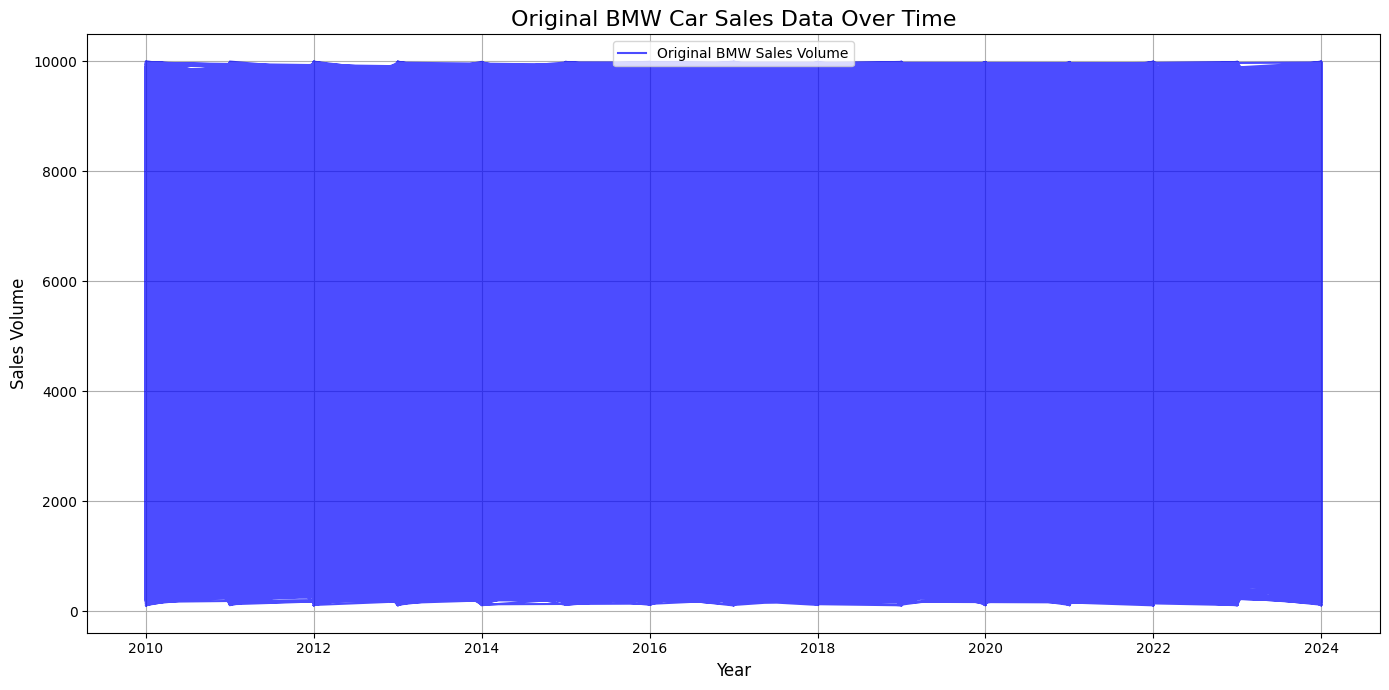


First 10 values of Rolling Mean (window=5):
Year
2016-01-01       NaN
2013-01-01       NaN
2022-01-01       NaN
2024-01-01       NaN
2020-01-01    5169.8
2017-01-01    3756.2
2022-01-01    4660.4
2014-01-01    3388.0
2016-01-01    4367.4
2019-01-01    4633.6
Name: Sales_Volume, dtype: float64

First 20 values of Rolling Mean (window=10):
Year
2016-01-01       NaN
2013-01-01       NaN
2022-01-01       NaN
2024-01-01       NaN
2020-01-01       NaN
2017-01-01       NaN
2022-01-01       NaN
2014-01-01       NaN
2016-01-01       NaN
2019-01-01    4901.7
2012-01-01    4121.7
2016-01-01    4604.1
2020-01-01    4715.8
2020-01-01    4777.9
2017-01-01    5199.0
2014-01-01    5852.3
2013-01-01    5613.5
2017-01-01    6525.8
2017-01-01    6119.4
2012-01-01    6388.7
Name: Sales_Volume, dtype: float64


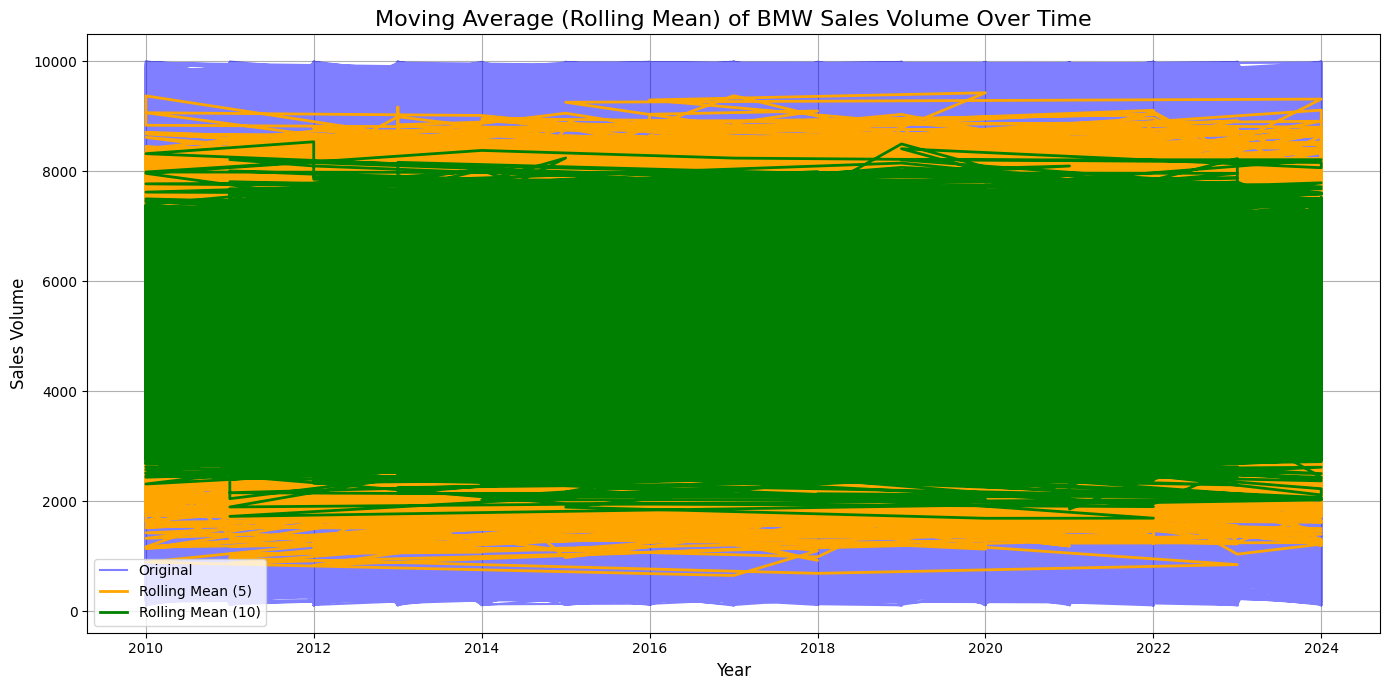

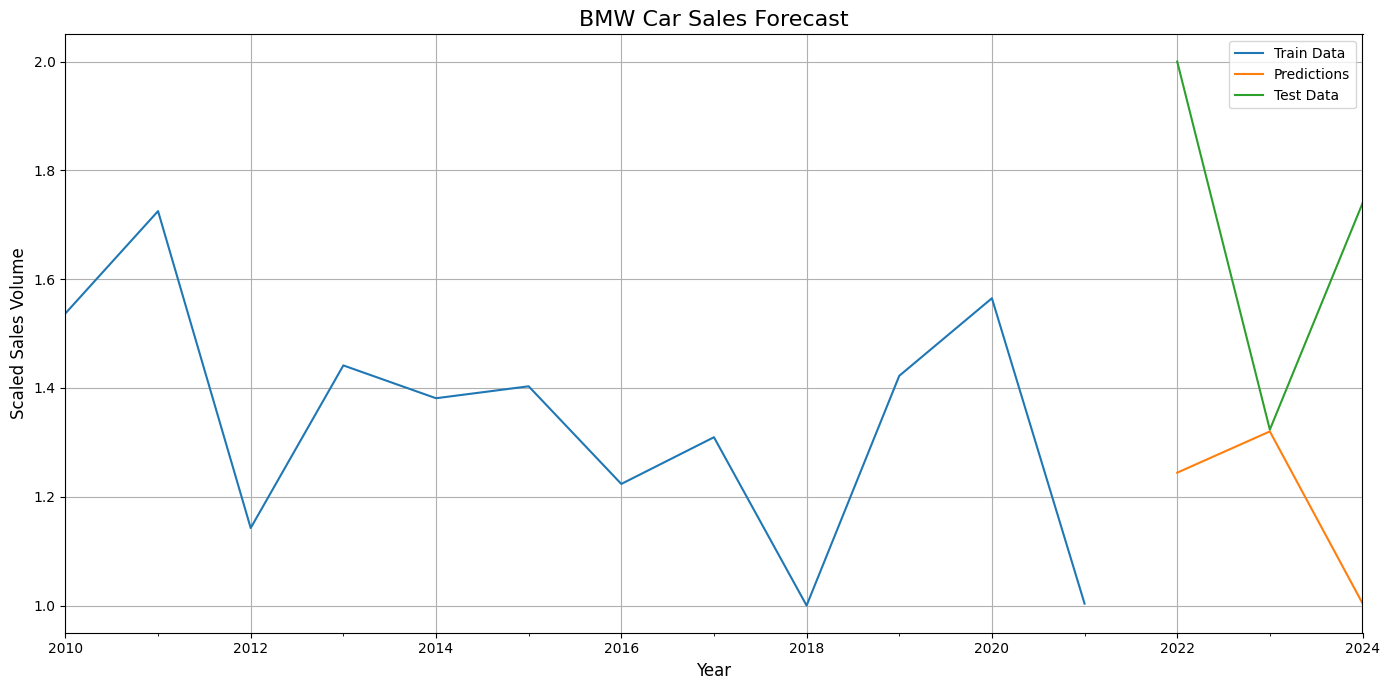


Root Mean Square Error (RMSE): 0.6087865934668141
Variance: 0.27450275135746516 Mean: 1.4143987848593


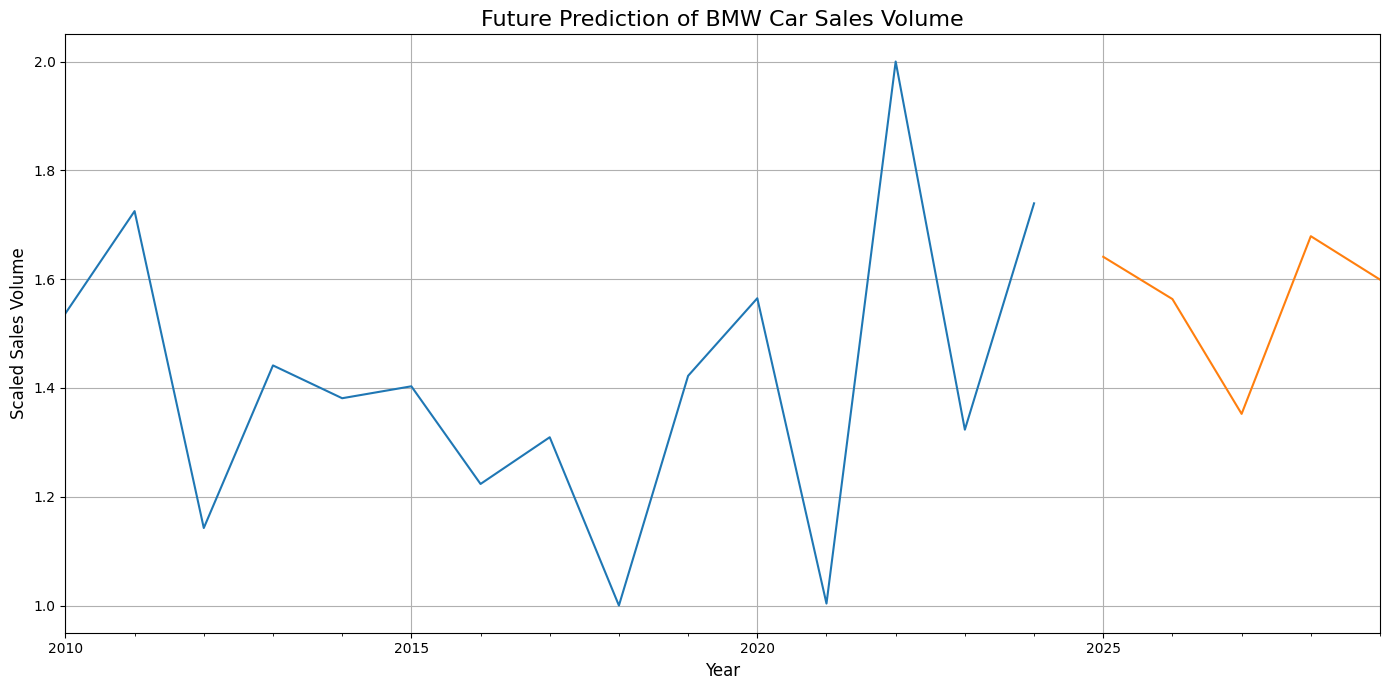

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read dataset
data = pd.read_csv("/content/BMW_Car_Sales_Classification.csv")

# Convert 'Year' to datetime and set as index
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Extract Sales_Volume column
sales_data = data[['Sales_Volume']]
print("Shape of the dataset:", sales_data.shape)
print("First 10 rows of the dataset:")
print(sales_data.head(10))

# Plot original data
plt.figure(figsize=(14, 7))  # Increased figure size
plt.plot(sales_data['Sales_Volume'], label='Original BMW Sales Volume', color='blue', alpha=0.7) # Added alpha for transparency
plt.title('Original BMW Car Sales Data Over Time', fontsize=16) # Improved title
plt.xlabel('Year', fontsize=12) # Increased font size for label
plt.ylabel('Sales Volume', fontsize=12) # Increased font size for label
plt.legend()
plt.grid(True) # Ensured grid is visible
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Rolling Mean with window = 5
rolling_mean_5 = sales_data['Sales_Volume'].rolling(window=5).mean()
print("\nFirst 10 values of Rolling Mean (window=5):")
print(rolling_mean_5.head(10))

# Rolling Mean with window = 10
rolling_mean_10 = sales_data['Sales_Volume'].rolling(window=10).mean()
print("\nFirst 20 values of Rolling Mean (window=10):")
print(rolling_mean_10.head(20))

# Plot Rolling Means
plt.figure(figsize=(14, 7))  # Increased figure size
plt.plot(sales_data['Sales_Volume'], label='Original', color='blue', alpha=0.5) # Added alpha for transparency
plt.plot(rolling_mean_5, label='Rolling Mean (5)', color='orange', linewidth=2) # Increased linewidth
plt.plot(rolling_mean_10, label='Rolling Mean (10)', color='green', linewidth=2) # Increased linewidth
plt.title('Moving Average (Rolling Mean) of BMW Sales Volume Over Time', fontsize=16) # Improved title
plt.xlabel('Year', fontsize=12) # Increased font size for label
plt.ylabel('Sales Volume', fontsize=12) # Increased font size for label
plt.legend()
plt.grid(True) # Ensured grid is visible
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Resample yearly (if needed) and scale
sales_yearly = sales_data.resample('YS').mean()
scaler = MinMaxScaler()
scaled_data = pd.Series(
    scaler.fit_transform(sales_yearly.values.reshape(-1,1)).flatten(),
    index=sales_yearly.index
)
scaled_data = scaled_data + 1

# Train-test split
x = int(len(scaled_data) * 0.8)
train_data = scaled_data[:x]
test_data = scaled_data[x:]

# Exponential Smoothing
model = ExponentialSmoothing(train_data, trend='add', seasonal='mul', seasonal_periods=3).fit()
predictions = model.forecast(steps=len(test_data))

# Plot Train/Test/Predictions
ax = train_data.plot(figsize=(14,7), label="Train Data") # Increased figure size and added label
predictions.plot(ax=ax, label="Predictions") # Added label
test_data.plot(ax=ax, label="Test Data") # Added label
ax.set_title('BMW Car Sales Forecast', fontsize=16) # Improved title
ax.set_xlabel('Year', fontsize=12) # Increased font size for label
ax.set_ylabel('Scaled Sales Volume', fontsize=12) # Increased font size for label
ax.legend()
plt.grid(True) # Ensured grid is visible
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print("\nRoot Mean Square Error (RMSE):", rmse)

# Variance and Mean
print("Variance:", np.sqrt(scaled_data.var()), "Mean:", scaled_data.mean())

# Future Forecast
model_full = ExponentialSmoothing(scaled_data, trend='add', seasonal='mul', seasonal_periods=3).fit()
future_predictions = model_full.forecast(steps=5)

ax = scaled_data.plot(figsize=(14,7), label="Yearly Sales Data") # Increased figure size and added label
future_predictions.plot(ax=ax, label="Future Predictions") # Added label
ax.set_xlabel('Year', fontsize=12) # Increased font size for label
ax.set_ylabel('Scaled Sales Volume', fontsize=12) # Increased font size for label
ax.set_title('Future Prediction of BMW Car Sales Volume', fontsize=16) # Improved title
plt.grid(True) # Ensured grid is visible
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()